In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from joblib import Parallel, delayed

from personal_ipynb.datasets import *

from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', 150)

# AARRR Framework 지표 내용

## Acquisition

| 지표 | 정의 | 계산식 |
|------|------|------|
| **신규 사용자 수 (NU, New User)** | 특정 서비스에 방문한 이력이 없는 상태에서, 처음 방문하거나 상호작용한 사용자의 수 | - |
| **회원 가입 수 (Sign Up)** | 특정 서비스에 회원 가입한 사용자의 수 | - |
| **앱 다운로드 수 (App Installs)** | 특정 앱(어플리케이션)을 다운로드한 수 | - |
| **리드 수 (Leads)** | 일정 수준의 정보를 제공하는 잠재 고객, 혹은 고객 정보 그 자체의 수 | - |
| **고객 획득 비용 (CAC, Customer Acquisition Cost)** | 신규 고객 1명을 획득하기 위해 필요한 비용 | **블렌디드 CAC** : 고객 획득을 위해 투입한 전체 금액 / 획득한 전체 고객 수 <br> **매체별 CAC** : 특정 광고 매체에서 고객 획득을 위해 투입한 금액 / 해당 매체에서 획득한 고객 수 |
| **(광고) 클릭률 (CTR, Click-Through Rate)** | 광고에 노출된 사용자 중에, 광고를 클릭한 사용자의 비율 | (광고 클릭 수 / 광고 노출 수) * 100 |
| **(광고) 조회율 (VTR, View-Through Rate)** | 영상 광고에 노출된 사용자 중에, 영상을 조회한 사용자의 비율 | (광고 조회 수 / 광고 노출 수) * 100 |
| **(광고) 전환율 (CVR, Conversion Rate)** | 광고를 클릭하여 유입된 사용자 중에, 주요한 전환 행동을 한 사용자의 비율 | (전환 수 / 광고 클릭 수) * 100 |
| **CPM (Cost-Per-Mille)** | 광고 1,000번 노출당 비용 | (총 광고 비용 / 광고 노출 수) * 1000 |
| **CPC (Cost-Per-Click)** | 광고 클릭당 비용 | 총 광고 비용 / 광고 클릭 수 |
| **CPV (Cost-Per-View)** | 영상 광고 조회당 비용 | 총 광고 비용 / 광고 조회 수 |
| **CPA (Cost-Per-Action)** | 특정 액션(회원가입, 상품 구매, 이벤트 참여 등)당 비용 | 총 광고 비용 / 특정 액션이 발생한 수 |
| **CPI (Cost-Per-Install)** | 앱 설치당 비용 | 총 광고 비용 / 앱 설치 수 |

## Activation

| 지표 | 정의 | 계산식 |
|------|------|------|
| **체류 시간 (DT, Duration Time)** | 사용자가 특정 서비스에 머무른 시간 | **평균 체류 시간** = 총 체류 시간(사용자들이 방문하여 머무른 전체 시간) / 방문한 전체 사용자 수 |
| **평균 페이지 체류 시간 (Average Time on Page)** | 사용자가 서비스 내의 단일 페이지에서 머무른 평균 시간 | 단일 페이지의 총 체류 시간 / 해당 페이지를 방문한 사용자 수 |
| **평균 세션 시간 (Average Session Duration)** | 단일 세션 동안 사용자가 특정 서비스에서 머무른 평균 시간 | 총 세션 시간(각 세션의 ‘세션 종료 시각 - 세션 시작 시각’의 총합) / 세션 수 |
| **페이지 뷰 (PV, Page View)** | 특정 웹사이트나 서비스를 방문하여 열람한 페이지의 수 (중복 포함) | - |
| **순 방문자 수 (UV, Unique Visitor)** | 특정 웹사이트나 서비스에 방문한 사용자 중 중복되는 사용자를 배제한 순 방문자 수 | - |
| **페이지 이탈률 (Bounce Rate, 반송률)** | 웹이나 앱에서 첫 페이지만 조회한 후, 추가적인 행동이나 상호작용 없이 바로 이탈한 사용자의 비율 | (반송 수 / 방문 수) * 100 <br> *반송 수 : 랜딩 페이지에 방문하여 1PV만을 발생시킨 방문의 수* |
| **Aha-moment 전환율** | Aha-moment를 경험하는 사용자의 비율 | (Aha-moment를 경험한 사용자 수 / 전체 사용자 수) * 100 |
| **구매 전환율 / 구독 전환율** | 전체 방문자 중 구매/구독을 한 사용자의 비율 | (구매 수 or 구독 수 / 방문 수) * 100 |
| **세부 퍼널 단계별 전환율** | 세부 퍼널(Aha-moment 퍼널, 구매 퍼널, 구독 퍼널 등) 안에서의 단계별 전환율 | (이후 단계로 전환된 수 / 이전 단계의 수) * 100 |

## Retention

| 지표 | 정의 | 계산식 |
|------|------|------|
| **유지율 (Retention Rate, 잔존율)** | 사용자가 유지되는 비율 | (유지된 사용자 수 / 기존 사용자 수) * 100 |
| **이탈률 (Churn Rate)** | 사용자가 이탈하는 비율 | (이탈한 사용자 수 / 기존 사용자 수) * 100 |
| **재구매율 / 재구독률** | 첫 구매후 특정 단위 기간(1주, 1개월, 3개월 등)내에 다시 구매/구독하는 사용자의 비율 | (재구매 or 재구독한 사용자 수 / 기존 사용자 수) * 100 |
| **사용자 고착도 (Stickiness)** | 사용자가 서비스에 계속해서 방문하는 정도 | DAU(일간 활성 사용자 수) / MAU(월간 활성 사용자 수) * 100 |
| **활성 사용자 수 (AU, Active User)** | 특정 웹사이트, 앱 또는 플랫폼과 상호작용하며 활성화된 사용자 수 (중복 제거) | - |
| **기간별 활성 사용자 수** | 특정 기간 동안 활성 사용자 수 (HAU, DAU, WAU, MAU) | **HAU** : 시간당 활성 사용자 수 <br> **DAU** : 일간 활성 사용자 수 <br> **WAU** : 주간 활성 사용자 수 <br> **MAU** : 월간 활성 사용자 수 |

## Revenue

| 지표 | 정의 | 계산식 |
|------|------|------|
| **매출 (Revenue)** | 비즈니스가 고객에게 상품 혹은 서비스를 판매하여 창출하는 총 금액으로, 비즈니스 운영과 관련된 비용을 공제하기 전의 금액 | - |
| **매출총이익 (Gross Profit, 마진)** | 매출액에서 매출원가(COGS, 제품이나 서비스를 제공하는 데 드는 직접 비용)를 차감한 금액 | 매출 - 매출 원가 |
| **매출총이익률 (Gross Profit Margin, 마진율)** | 매출 대비 매출총이익(마진)의 비율 | {(매출 - 매출 원가) / 매출} * 100 |
| **순이익 (Net Profit, Net Income)** | 매출에서 매출 원가, 인건비, 광고비, 세금 등 비즈니스가 사용한 모든 비용을 차감하고 영업외수익과 비용까지 고려한 뒤 남은 금액으로, 비즈니스의 순수한 이익 | 매출 - 매출 원가 - 판매관리비 + (금융수익 - 금융비용) + (영업외수익 - 영업외비용) - 법인세비용 |
| **MRR (Monthly Recurring Revenue, 월간 반복 매출)** | 매월 반복적으로 발생하는 매출 | 기존 고객의 월간 매출(전월 매출) - 이탈 고객의 월간 기여 매출 + 신규/부활 고객의 월간 매출 + 플랜 업그레이드/다운그레이드로 인한 월간 매출 차액 |
| **ARR (Annual Recurring Revenue, 연간 반복 매출)** | 매년 반복적으로 발생하는 매출 | 기존 고객의 연간 매출(전년도 매출) - 이탈 고객의 연간 기여 매출 + 신규/부활 고객의 연간 매출 + 플랜 업그레이드/다운그레이드에 따른 연간 매출 차액 |
| **ROI (Return on Investment, 투자 수익률)** | 투자 비용(광고비를 포함한 모든 비용) 대비 수익률(순이익 기준) | (순이익 / 전체 투자 비용) * 100 |
| **ROAS (Return on Ad Spend, 광고 수익률)** | 투입한 광고 비용 대비 수익률(매출 기준) | (광고 캠페인을 통해 발생한 매출 / 투입한 총 광고 비용) * 100 <br> **매체별 ROAS** : (특정 광고 매체에서 발생한 매출 / 해당 매체에 투입한 총 광고 비용) * 100 |
| **PU (Paying User, 유료 결제 사용자 수)** | 유료 결제를 한 사용자의 수 | - |
| **ARPU (Average Revenue Per User)** | 고객 평균 매출로, 무료 사용자와 유료 결제 사용자를 포함한 전체 사용자 1인당 평균 매출 | 총 매출 / 전체 사용자 수 |
| **ARPPU (Average Revenue per Paying User)** | 유료 고객 평균 매출로, 유료 결제 사용자 1인당 평균 매출 | 총 매출 / 유료 결제 사용자 수 (PU) |
| **ARPDAU (Average Revenue Per Daily Active User)** | DAU(일간 활성 사용자) 1인당 일 평균 매출 | 일 매출 / DAU(일간 활성 사용자 수) |
| **LTR (Lifetime Revenue, 고객 생애 매출)** | 고객 한 명이 제품/서비스를 이용하는 전체 생애 동안 우리 비즈니스에서 발생시킬 것으로 예상되는 기대 매출 | 고객이 생애 동안 누적하여 발생시킨 총 매출의 합 / 고객 수 |
| **LTV (Lifetime Value, 고객 생애 가치)** | 고객 한 명이 제품/서비스를 이용하는 전체 생애 동안 우리 비즈니스에서 발생시킬 것으로 예상되는 기대 가치(순이익 기준) | {평균 구매 금액 * 마진율 * 구매 빈도(구매 횟수) * 고객 수명} - (고객 획득 비용 + 고객 유지 비용) |

## Referral

| 지표 | 정의 | 계산식 |
|------|------|------|
| **바이럴 주기 시간 (Viral Cycle Time)** | 기존 사용자가 친구를 초대하고, 초대받은 친구가 신규 사용자로 유입되기까지 걸리는 시간 | - |
| **바이럴 계수 (Viral Coefficient)** | 기존 사용자 1명당 만들어내는 신규 사용자의 수 | 기존 사용자 1명당 평균 친구 초대 수 * 초대받은 친구의 초대 수락 비율 |
| **NPS (Net Promoter Score, 순 추천 지수)** | 기존 사용자가 제품이나 서비스, 브랜드를 추천할 가능성으로, 고객 충성도를 측정하는 표준 척도 | 추천 그룹의 비율(%) - 비추천 그룹의 비율(%) |
| **SNS 공유 수 (SNS Share Rate)** | 공유 수, 댓글 수, 태그 수 등 | - |

---
# 사용자 여정 로드맵 기준 분석

## ARPPU & ARPU

데이터 기한 내용
- complete.subscription : 2022-01-01 ~ 2024-01-01
- renew.subscription : 2022-09-08 ~ 2024-01-01
- resubscribe.subscription : 2022-09-08 ~ 2024-01-01

ARPPU 와 ARPU를 구하기 전 유의사항
- 기간이 다른 데이터가 포함될 경우 ARPPU/ARPU가 왜곡될 가능성이 존재한다. <br/>
    → 해결방법 : 세 데이터가 모두 존재하는 데이터 기간, complete.subscription만 존재하는 데이터 기간을 따로 분리하여 표기하였다.
- merge(병합) 과정에서 NaN 값이 생길 가능성이 생긴다. <br/>
    → 해결방법 : 모든 결제 데이터를 merge를 사용하지 않고 axis=0 방향으로 concat을 시켰다. (데이터 컬럼값이 모두 동일하기 때문)
- ARPPU 계산 공식을 적용할 때 데이터 정렬 문제. <br/>
    → 해결방법 : period를 기준으로 groupby하면 period가 순차적으로 정렬된다.

데이터 공통 기한
- 2022-09-08 ~ 2024-01-01

분리된 데이터 (complete.subscription)
- 2022-01-01 ~ 2022-09-08

### 공통 데이터란

In [3]:
# 데이터 불러오기
complete_subscription_df = complete.subscription()
renew_subscription_df = renew.subscription()
resubscribe_df = resubscribe.subscription()

In [4]:
# 함수 정의

# period 변환 함수
def change_period(data):
    data = data.copy()
    data['period'] = data['client_event_time'].dt.to_period('M')
    
    return data

# groupby 함수
def groupby(data):
    # 유료 사용자를 기준으로 집계
    data = data.groupby('period').agg(
        total_paid_amount = ('paid_amount', 'sum'),  # 총 유료 금액
        total_count = ('user_id', 'count'),  # 전체 결제 건 수
        total_user = ('user_id', 'nunique'), # 전체 유저 수
        one_month_plan_user = ('plan.price', lambda x: (x.isin([15920])).sum()),  # 1개월 플랜 사용자
        three_month_plan_user = ('plan.price', lambda x: (x.isin([42960])).sum()),  # 3개월 플랜 사용자
        one_year_plan_user = ('plan.price', lambda x: (x.isin([131600])).sum()),  # 1년 플랜 사용자
        promotion_plan_user = ('plan.price', lambda x: (x.isin([79200, 95520, 95200, 91200, 87200, 83200])).sum()),  # 프로모션 플랜 사용자
    )
    return data


In [5]:
# 모든 결제 완료 이력
concat_df = pd.concat([complete_subscription_df, renew_subscription_df, resubscribe_df], axis=0)

# 필요한 데이터 컬럼만 추출
concat_df = concat_df[['user_id', 'client_event_time', 'event_type', 'plan.price', 'paid_amount']]

# Data Type 변경
concat_df['client_event_time'] = pd.to_datetime(concat_df['client_event_time']) + pd.Timedelta(hours=9)
concat_df['client_event_time'] = concat_df['client_event_time'].dt.date

# 특정한 열에 중복값이 있는지 체크 후 첫번째 값만 남기고 제거
concat_df = concat_df.drop_duplicates(subset=['user_id', 'client_event_time', 'paid_amount'], keep='first')

# 날짜 비교를 위한 데이터 재변환
concat_df['client_event_time'] = pd.to_datetime(concat_df['client_event_time'])

# 데이터 확인
display(concat_df)

,user_id,client_event_time,event_type,plan.price,paid_amount
0,1116a2ae90ca6b06f85feba27ad51ef0,2023-04-06,complete.subscription,15920,15920
1,c0f5678df8967163e6e2c464ed006791,2023-04-10,complete.subscription,131600,131600
2,79421b5d038205ad7adbb1e2c3b89741,2023-03-12,complete.subscription,131600,119756
3,bdffe1f18684704d4ea2d7eebcaed180,2023-04-12,complete.subscription,131600,131600
4,d4f54ecf6c4d7bf8742f80505f02d6dc,2023-05-31,complete.subscription,15920,15920
...,...,...,...,...,...
786,482cf2ed1eefbe648ce156e43d323114,2023-10-21,resubscribe.subscription,15920,15920
787,b6b9428216580dbdc053e0bb19083be1,2023-07-31,resubscribe.subscription,15920,15920
788,eaff98093acb9a109975957cafb2d105,2023-12-31,resubscribe.subscription,95520,95520
789,e6aace24ed8703d42ce43c4b8b1c7d66,2023-12-29,resubscribe.subscription,95520,95520


In [6]:
concat_df['plan.price'].unique()

array([ 15920, 131600,  95200,  91200,  87200,  83200,  19920,  14328,
        42960, 118440,  79200,  95520])

In [7]:
# complete.subscription, renew.subscription, resubscibe.subscription의 데이터가 모두 존재하는 부분을 분리
separated_df1 = concat_df[(concat_df['client_event_time'] >= '2022-09-08') & (concat_df['client_event_time'] <= '2024-01-01')]

# complete.subscription만 존재하는 데이터 분리
separated_df2 = concat_df[concat_df['client_event_time'] < '2022-09-08']

In [8]:
# 분리된 데이터 리스트 저장
list_df = [separated_df1, separated_df2]

# 임시용 보관 데이터 생성
list_groupby = []

for i in range(len(list_df)):
    # Month period 타입 변환
    month_df = change_period(list_df[i])

    # groupby 및 reset_index()
    df_groupby = groupby(month_df).reset_index()

    # 데이터 타입 변환
    df_groupby['period'] = df_groupby['period'].dt.to_timestamp()

    # 리스트에 저장
    list_groupby.append(df_groupby)
    
# 결과 저장
separated_df1_month, separated_df2_month = list_groupby

# 데이터 확인
for list in list_groupby:
    display(list)

,period,total_paid_amount,total_count,total_user,one_month_plan_user,three_month_plan_user,one_year_plan_user,promotion_plan_user
0,2022-09-01,24248427,922,918,715,154,53,0
1,2022-10-01,30143986,1106,1097,801,246,59,0
2,2022-11-01,27486958,1727,1721,1513,155,59,0
3,2022-12-01,185734071,2964,2906,714,87,0,2163
4,2023-01-01,199342010,2709,2677,487,96,0,2126
5,2023-02-01,59286291,979,967,543,72,364,0
6,2023-03-01,33452804,759,738,532,50,176,0
7,2023-04-01,38089315,1089,1081,871,46,172,0
8,2023-05-01,33894113,1109,1105,933,35,133,0
9,2023-06-01,41067210,1480,1470,1296,29,149,0


,period,total_paid_amount,total_count,total_user,one_month_plan_user,three_month_plan_user,one_year_plan_user,promotion_plan_user
0,2022-01-01,2466721,54,54,20,26,8,0
1,2022-02-01,21949193,535,531,311,133,91,0
2,2022-03-01,25090147,652,633,402,139,111,0
3,2022-04-01,23275321,562,544,320,134,108,0
4,2022-05-01,23804028,632,617,361,173,98,0
5,2022-06-01,23111595,602,583,342,166,94,0
6,2022-07-01,26527391,710,691,430,168,112,0
7,2022-08-01,16304670,399,383,236,83,80,0
8,2022-09-01,1697591,50,50,33,12,5,0


---
### Monthly Revenue

C:\Users\lento\AppData\Local\Temp\ipykernel_28492\2739887338.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


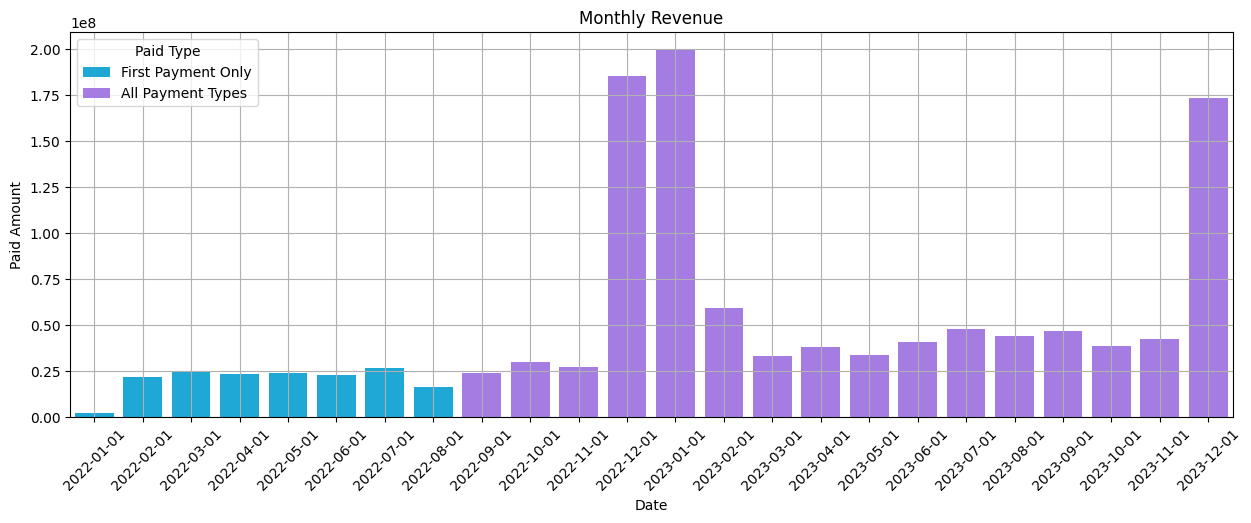

In [30]:
# 그래프 생성
fig, ax1 = plt.subplots(figsize=(15, 5))

# 라인 플롯
sns.barplot(x=separated_df2_month['period'], y=separated_df2_month['total_paid_amount'], ax=ax1, label='First Payment Only', color='#01b6f3')
sns.barplot(x=separated_df1_month['period'][:-1], y=separated_df1_month['total_paid_amount'][:-1], ax=ax1, label='All Payment Types', color='#a26cf3')

# zorder 조정
ax1.set_zorder(3)
ax1.grid(True, zorder=0)

# 라벨 및 제목 설정
ax1.set_xlabel('Date')
ax1.set_ylabel('Paid Amount')
plt.title('Monthly Revenue')

# x축 회전
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# 투명하게 만들어서 grid가 보이도록 설정
ax1.patch.set_visible(False)

# 범례 수동으로 설정 (색상과 항목이 매칭되도록)
ax1.legend( title='Paid Type', loc='upper left')

plt.show()

---
### ARPPU

In [52]:
# 데이터 초기화
arppu_list = []

# ARPPU 계산
for list in list_groupby:
    list['ARPPU'] = round(list['total_paid_amount'] / list['total_user'], 2)
    arppu_list.append(list)

# 데이터 확인
for list in arppu_list:
    display(list)

,period,total_paid_amount,total_count,total_user,one_month_plan_user,three_month_plan_user,one_year_plan_user,promotion_plan_user,ARPPU
0,2022-09-01,24248427,922,918,715,154,53,0,26414.41
1,2022-10-01,30143986,1106,1097,801,246,59,0,27478.57
2,2022-11-01,27486958,1727,1721,1513,155,59,0,15971.50
3,2022-12-01,185734071,2964,2906,714,87,0,2163,63914.00
4,2023-01-01,199342010,2709,2677,487,96,0,2126,74464.70
5,2023-02-01,59286291,979,967,543,72,364,0,61309.50
6,2023-03-01,33452804,759,738,532,50,176,0,45329.00
7,2023-04-01,38089315,1089,1081,871,46,172,0,35235.26
8,2023-05-01,33894113,1109,1105,933,35,133,0,30673.41
9,2023-06-01,41067210,1480,1470,1296,29,149,0,27936.88


,period,total_paid_amount,total_count,total_user,one_month_plan_user,three_month_plan_user,one_year_plan_user,promotion_plan_user,ARPPU
0,2022-01-01,2466721,54,54,20,26,8,0,45680.02
1,2022-02-01,21949193,535,531,311,133,91,0,41335.58
2,2022-03-01,25090147,652,633,402,139,111,0,39636.88
3,2022-04-01,23275321,562,544,320,134,108,0,42785.52
4,2022-05-01,23804028,632,617,361,173,98,0,38580.27
5,2022-06-01,23111595,602,583,342,166,94,0,39642.53
6,2022-07-01,26527391,710,691,430,168,112,0,38389.86
7,2022-08-01,16304670,399,383,236,83,80,0,42570.94
8,2022-09-01,1697591,50,50,33,12,5,0,33951.82


In [53]:
# ARPPU 그래프 생성 전 전처리 작업란
# period x열 생성을 위한 병합
merged_df = pd.merge(
    arppu_list[0],
    arppu_list[1],
    on='period', how='outer',
    suffixes=('_df1', '_df2'))

# period를 string으로 변환
merged_df['period'] = merged_df['period'].dt.strftime('%Y-%m')

# '2024-01' 데이터 제거
merged_df = merged_df[merged_df['period'] != '2024-01']

# 데이터 확인
display(merged_df)

,period,total_paid_amount_df1,total_count_df1,total_user_df1,one_month_plan_user_df1,three_month_plan_user_df1,one_year_plan_user_df1,promotion_plan_user_df1,ARPPU_df1,total_paid_amount_df2,total_count_df2,total_user_df2,one_month_plan_user_df2,three_month_plan_user_df2,one_year_plan_user_df2,promotion_plan_user_df2,ARPPU_df2
0,2022-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2466721.0,54.0,54.0,20.0,26.0,8.0,0.0,45680.02
1,2022-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21949193.0,535.0,531.0,311.0,133.0,91.0,0.0,41335.58
2,2022-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25090147.0,652.0,633.0,402.0,139.0,111.0,0.0,39636.88
3,2022-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23275321.0,562.0,544.0,320.0,134.0,108.0,0.0,42785.52
4,2022-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23804028.0,632.0,617.0,361.0,173.0,98.0,0.0,38580.27
5,2022-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23111595.0,602.0,583.0,342.0,166.0,94.0,0.0,39642.53
6,2022-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26527391.0,710.0,691.0,430.0,168.0,112.0,0.0,38389.86
7,2022-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16304670.0,399.0,383.0,236.0,83.0,80.0,0.0,42570.94
8,2022-09,24248427.0,922.0,918.0,715.0,154.0,53.0,0.0,26414.41,1697591.0,50.0,50.0,33.0,12.0,5.0,0.0,33951.82
9,2022-10,30143986.0,1106.0,1097.0,801.0,246.0,59.0,0.0,27478.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# Subscribe Plan Count 그래프 생성 전 전처리 작업란
# melt()를 이용하여 데이터 변환 후 중복된 period 값 합산
temp_list = []
for i in range(2):
    name1 = f'one_month_plan_user_df{i+1}'
    name2 = f'three_month_plan_user_df{i+1}'
    name3 = f'one_year_plan_user_df{i+1}'
    name4 = f'promotion_plan_user_df{i+1}'

    data = merged_df.melt(
        id_vars='period',
        value_vars=[name1, name2, name3, name4],
        var_name='plan_type',
        value_name='user_count')

    # 'df1'과 'df2'를 제거한 새로운 plan_type을 생성
    data['plan_type'] = data['plan_type'].str.replace('_df1', '').str.replace('_df2', '')

    # '2024-01' 데이터 제거
    data = data[data['period'] != '2024-01']

    temp_list.append(data)

# 두 데이터프레임을 합치고 동일한 period와 plan_type 값을 그룹화하여 합산
subscribe_plan_df = pd.concat(temp_list).groupby(['period', 'plan_type']).sum().reset_index()

# 데이터 확인
display(subscribe_plan_df)

,period,plan_type,user_count
0,2022-01,one_month_plan_user,20.0
1,2022-01,one_year_plan_user,8.0
2,2022-01,promotion_plan_user,0.0
3,2022-01,three_month_plan_user,26.0
4,2022-02,one_month_plan_user,311.0
...,...,...,...
91,2023-11,three_month_plan_user,15.0
92,2023-12,one_month_plan_user,1066.0
93,2023-12,one_year_plan_user,122.0
94,2023-12,promotion_plan_user,1478.0


C:\Users\lento\AppData\Local\Temp\ipykernel_24132\3627446777.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


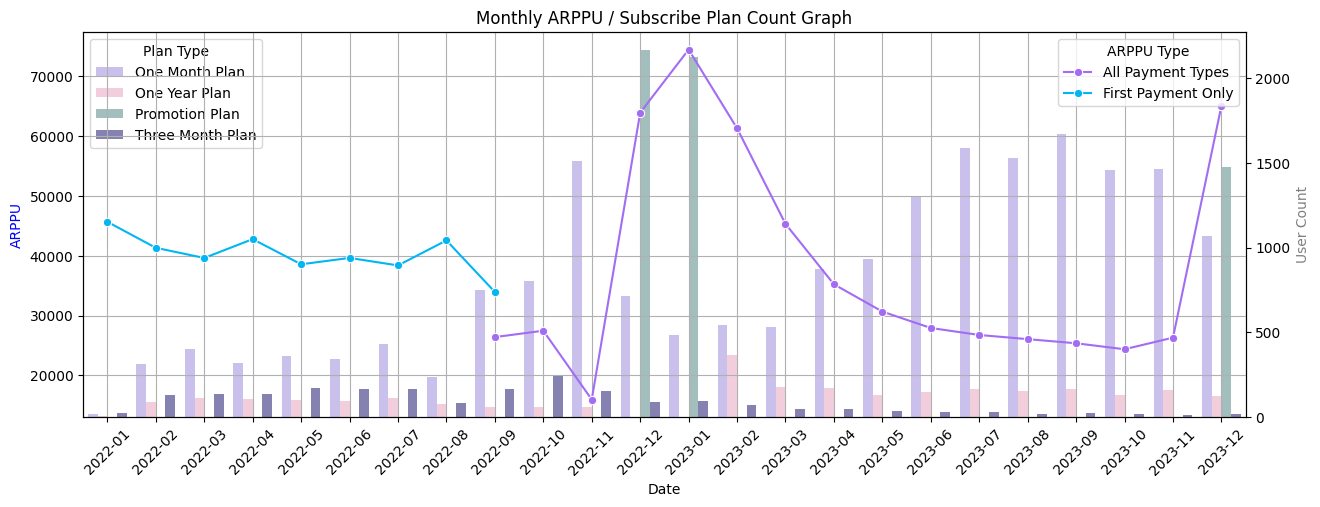

In [55]:
# 그래프 생성
fig, ax1 = plt.subplots(figsize=(15, 5))

# 라인 플롯
sns.lineplot(x=merged_df['period'], y=merged_df['ARPPU_df1'], marker='o', ax=ax1, label='All Payment Types', color='#a26cf3')
sns.lineplot(x=merged_df['period'], y=merged_df['ARPPU_df2'], marker='o', ax=ax1, label='First Payment Only', color='#01b6f3')

# 바 플롯을 보조로 사용하기 위한 준비
ax2 = ax1.twinx()

# 색상 설정
plan_colors = {
    'one_month_plan_user': '#c5b9f2', 
    'three_month_plan_user': '#7e79b8', 
    'one_year_plan_user': '#f8c8dc', 
    'promotion_plan_user': '#9dc3c1'
}

# 바 플롯 그리기 (색상 지정 및 alpha 조정)
sns.barplot(x='period', y='user_count', hue='plan_type', data=subscribe_plan_df, ax=ax2, palette=plan_colors)

# zorder 조정
ax1.set_zorder(3)
ax2.set_zorder(2)
ax1.grid(True, zorder=0)

# 라벨 및 제목 설정
ax1.set_xlabel('Date')
ax1.set_ylabel('ARPPU', color='b')
ax2.set_ylabel('User Count', color='gray')
plt.title('Monthly ARPPU / Subscribe Plan Count Graph')

# x축 회전
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# 투명하게 만들어서 grid가 보이도록 설정
ax1.patch.set_visible(False)

# 범례 수동으로 설정 (색상과 항목이 매칭되도록)
handles, labels = ax2.get_legend_handles_labels()
legend2 = ax1.legend( title='ARPPU Type', loc='upper right')
legend2 = ax2.legend(handles=handles, labels=['One Month Plan', 'One Year Plan', 'Promotion Plan', 'Three Month Plan'], title='Plan Type', loc='upper left')

# 범례 최상단 배치
legend2.set_zorder(4)

plt.show()

---
### ARPU 계산 전 데이터 전처리

start.free_trial, enter.lesson_page 데이터를 통한 무료체험 유저 데이터 필터링

In [105]:
# 데이터 불러오기
# 기존 데이터는 주석 처리
start_free_trial_df = start.free_trial()
complete_signup_df = complete.signup()
enter_lesson_page_df = enter.lesson_page()
# complete_subscription_df = complete.subscription()

e:\Visual Studio Code\codeit\intermediate_project\datasets.py:132: DtypeWarning: Columns (9,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file_path)


In [106]:
# 임시 저장할 리스트 생성
temp_list = []

for data in [complete_signup_df, enter_lesson_page_df, complete_subscription_df]:
    
    # 필요한 컬럼 가져오기
    if 'is_trial' in data.columns:
        data = data[['user_id', 'client_event_time', 'event_type', 'is_trial']]
    else:
        data = data[['user_id', 'client_event_time', 'event_type']]

    # 데이터 타입 변환
    data['client_event_time'] = pd.to_datetime(data['client_event_time'])

    # 한국 시간으로 변환
    data['client_event_time'] = data['client_event_time'] + pd.Timedelta(hours=9)

    # # start.free_trial의 마지막 데이터를 기준으로 시간 필터링
    # data = data[data['client_event_time'] > '2023-05-01']

    # enter.lesson_page 데이터에서 조건에 맞는 데이터 필터링
    if data['event_type'].isin(['enter.lesson_page']).any():

        # is_trial이 notnull이고, 그 값이 True인 값 필터링
        data = data[(data['is_trial'].notnull()) & (data['is_trial'] == True)]

        # is_trial 컬럼 삭제
        data = data.drop(labels='is_trial', axis=1)

        # 작업이 완료된 데이터 중 user_id가 겹치는 내용이 있을 경우 first값을 반환
        data = data.drop_duplicates(subset='user_id', keep='first')

    # complete.subscription 중 user_id가  겹치는 내용이 있을 경우 first값을 반환
    if data['event_type'].isin(['complete.subscription']).any():
        data = data.drop_duplicates(subset='user_id', keep='first')

    # period 컬럼 및 데이터 추가
    data['period'] = data['client_event_time'].dt.to_period('M')

    # 임시 리스트에 데이터 append
    temp_list.append(data)

# 데이터 concat
for_arpu_concat_df = pd.concat(temp_list, axis=0)

# concat한 데이터를 user_id, client_event_time, period를 기준으로 groupby후 event_type 표기
# groupby시 공통으로 묶인 데이터가 오름차순으로 정렬됨
# 차후 작업의 유용성을 위해 reset_index()를 통한 인덱스 초기화
for_arpu_groupby = for_arpu_concat_df.groupby(['user_id', 'client_event_time', 'period'])[['event_type']].sum().reset_index()

# 데이터 확인
display(for_arpu_concat_df)

C:\Users\lento\AppData\Local\Temp\ipykernel_17356\3099469032.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['client_event_time'] = pd.to_datetime(data['client_event_time'])
C:\Users\lento\AppData\Local\Temp\ipykernel_17356\3099469032.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['client_event_time'] = data['client_event_time'] + pd.Timedelta(hours=9)
C:\Users\lento\AppData\Local\Temp\ipykernel_17356\3099469032.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

,user_id,client_event_time,event_type,period
0,74d17c27a41656e7788b0c81d9f76cda,2023-04-06 06:33:26.068,complete.signup,2023-04
1,06b6868000a5d576180aca47896d6cce,2023-04-06 06:45:18.672,complete.signup,2023-04
2,e131c319972bd580146c5a2faba26613,2023-04-10 23:47:56.424,complete.signup,2023-04
3,e3b8bfa80d866f296aad139e09023ef3,2023-04-10 23:25:45.920,complete.signup,2023-04
4,5208a60918f18562ac9d668a35b20303,2023-04-10 23:09:50.698,complete.signup,2023-04
...,...,...,...,...
14283,6032a27a348504a2be30ac79256a6163,2023-12-29 22:37:29.864,complete.subscription,2023-12
14284,3280d2b1af281b9989e1708d6e3d681e,2023-12-29 22:28:22.696,complete.subscription,2023-12
14285,abebe3234041d14b5c0c5821bf90ab26,2023-12-29 22:58:50.397,complete.subscription,2023-12
14286,3ca22b0bade6b40d6274bf6d06bc4344,2023-12-29 22:48:13.849,complete.subscription,2023-12


In [107]:
del enter_lesson_page_df, complete_signup_df

In [108]:
# 병렬 실행 함수 정의
def process_user(unique_id, df):
    user_data = df[df['user_id'] == unique_id]

    if len(user_data) > 1 and user_data.iloc[0]['event_type'] == 'complete.signup':
        if user_data.iloc[1]['event_type'] == 'enter.lesson_page':
            return user_data
    return None

In [109]:
# # concat과 groupby를 거친 데이터의 user_id의 unique값이 몇 개인지 확인
# print(for_arpu_groupby['user_id'].nunique())

# # 병렬 처리 실행
# after_may_free_unique_user = for_arpu_groupby['user_id'].unique()
# results = Parallel(n_jobs=-1)(delayed(process_user)(uid, for_arpu_groupby) for uid in after_may_free_unique_user)

# # None 값 제거 후 데이터프레임 결합
# filtered_results = [res for res in results if res is not None]
# after_may_free_trial = pd.concat(filtered_results, axis=0) if filtered_results else pd.DataFrame()

# # reset_index()를 통한 인덱스 재정렬
# after_may_free_trial = after_may_free_trial.reset_index(drop=True)

# # 데이터 확인
# display(after_may_free_trial)

In [110]:
# user_id의 unique 개수 확인
print(for_arpu_groupby['user_id'].nunique())

# 병렬 처리를 위한 user_id 리스트 생성
after_may_free_unique_user = for_arpu_groupby['user_id'].unique()

# 데이터를 청크 단위로 나누기
num_chunks = min(8, len(after_may_free_unique_user) // 1000)  # 최대 8개 프로세스 사용 (적절히 조정)
user_chunks = np.array_split(after_may_free_unique_user, num_chunks)

# 병렬 처리 함수 정의
def process_user_chunk(user_chunk, df):
    results = [process_user(uid, df) for uid in user_chunk]
    return [res for res in results if res is not None]  # None 제거

# 병렬 실행
results = Parallel(n_jobs=num_chunks)(
    delayed(process_user_chunk)(chunk, for_arpu_groupby) for chunk in user_chunks
)

# 결과 결합
filtered_results = [item for sublist in results for item in sublist]  # 2D 리스트를 1D로 변환
after_may_free_trial = pd.concat(filtered_results, axis=0) if filtered_results else pd.DataFrame()

# 인덱스 재정렬
after_may_free_trial = after_may_free_trial.reset_index(drop=True)

# 데이터 확인
display(after_may_free_trial)

147502


,user_id,client_event_time,period,event_type
0,0000572f2ba8079bcefd2760b632e820,2023-03-18 19:33:16.237,2023-03,complete.signup
1,0000572f2ba8079bcefd2760b632e820,2023-03-18 19:34:28.892,2023-03,enter.lesson_page
2,0000572f2ba8079bcefd2760b632e820,2023-03-25 23:40:01.647,2023-03,complete.subscription
3,0003b028a745bdfda9e88539424248af,2023-06-24 15:11:23.962,2023-06,complete.signup
4,0003b028a745bdfda9e88539424248af,2023-06-24 15:11:24.810,2023-06,enter.lesson_page
...,...,...,...,...
31917,ffe800abf1a0c00994b2a5b1ce68c681,2023-10-30 03:09:42.524,2023-10,complete.subscription
31918,fffd757f689e039a1d4db0adc1b80b61,2023-01-16 20:11:17.956,2023-01,complete.signup
31919,fffd757f689e039a1d4db0adc1b80b61,2023-01-17 09:11:08.080,2023-01,enter.lesson_page
31920,ffffd8d78865a66cb3706977f29d1dec,2023-09-11 19:06:34.388,2023-09,complete.signup


In [111]:
start_free_trial_df = start.free_trial()

In [112]:
start_free_trial_df['client_event_time'] = pd.to_datetime(start_free_trial_df['client_event_time'])
start_free_trial_df['period'] = start_free_trial_df['client_event_time'].dt.to_period('M')
start_free_trial_df = start_free_trial_df[['user_id', 'client_event_time', 'period', 'event_type']]
start_free_trial_df = start_free_trial_df.drop_duplicates(subset='user_id', keep='first')
start_free_trial_df = start_free_trial_df.dropna()

In [113]:
start_free_trial_df

,user_id,client_event_time,period,event_type
0,06b6868000a5d576180aca47896d6cce,2023-04-05 21:49:36.156,2023-04,start.free_trial
1,40acc1ddfc012f3d2f58a3de95e9e748,2023-03-12 08:28:29.384,2023-03,start.free_trial
2,38aca03fba9753a6b2f31b829fb16a30,2023-03-12 08:35:00.107,2023-03,start.free_trial
3,cc8051a75f62278b0e4216dd0a182d8c,2023-04-12 11:36:50.250,2023-04,start.free_trial
4,4cc436ad294973993ccad3e3a70053a7,2023-02-18 04:13:20.822,2023-02,start.free_trial
...,...,...,...,...
30610,f095e292083223c9d60173f0a4173c26,2022-05-28 04:26:30.754,2022-05,start.free_trial
30612,1106d8a7404b563531e873ebebdcc864,2022-02-17 20:00:01.854,2022-02,start.free_trial
30613,a9d1d21e57dc87bd63cb3e69ff78ac32,2022-02-21 04:51:52.868,2022-02,start.free_trial
30618,fd2b864d7f354eb48a29ff2ce78d229d,2022-02-21 04:37:53.294,2022-02,start.free_trial


In [114]:
len(set(start_free_trial_df['user_id'].unique()) & set(after_may_free_trial['user_id'].unique()))

473

In [115]:
# 전처리한 데이터 concat
free_user_df = pd.concat(
    [start_free_trial_df,
     after_may_free_trial[after_may_free_trial['event_type'] == 'enter.lesson_page']],
     axis=0).reset_index(drop=True)

# free_user_df dop_duplicates()
free_user_df = free_user_df.drop_duplicates(subset='user_id', keep='first')

# 시간 데이터 한국시간으로 맞추기
free_user_df['client_event_time'] = free_user_df['client_event_time'] + pd.Timedelta(hours=9)

# 데이터 기한을 2022.01.01 ~ 2023.12.31로 맞추기
free_user_df = free_user_df[(free_user_df['client_event_time'] > '2022-01-01') & (free_user_df['client_event_time'] < '2024-01-01')]

# period값 변환
free_user_df['period'] = free_user_df['client_event_time'].dt.to_period('M')

# 시간 순으로 정렬
free_user_df = free_user_df.sort_values(by='client_event_time', ascending=True).reset_index(drop=True)

# 데이터 확인
display(free_user_df)

,user_id,client_event_time,period,event_type
0,e98481d6081c560ad6c9c01c4596129e,2022-01-01 09:17:55.165,2022-01,start.free_trial
1,28562e887d0942c8f422f1ffa1c12bc0,2022-01-01 09:30:35.744,2022-01,start.free_trial
2,0ac05541526958e4ffa257afe205fc57,2022-01-01 10:37:28.634,2022-01,start.free_trial
3,346239bb0b26fb4b4314b08e884b7e15,2022-01-01 11:11:57.529,2022-01,start.free_trial
4,2b18637d168277f9e981ffbe1e3e98f4,2022-01-01 11:18:56.150,2022-01,start.free_trial
...,...,...,...,...
31179,f4aaea2bccb927968f5d4701b306cd10,2023-12-28 19:59:31.986,2023-12,enter.lesson_page
31180,f52c72bf39117e998bb295f3be8d352f,2023-12-29 05:14:06.196,2023-12,enter.lesson_page
31181,76eb9779729953aee0baa6820b7be17b,2023-12-29 07:04:47.212,2023-12,enter.lesson_page
31182,ce19035f9279e1cf0e46cf97ef8a7039,2023-12-30 03:57:39.515,2023-12,enter.lesson_page


### ARPU

In [137]:
# period 변환
free_user_df['period'] = free_user_df['client_event_time'].dt.to_period('M')
free_user_df

,user_id,client_event_time,period,event_type
0,e98481d6081c560ad6c9c01c4596129e,2022-01-01 09:17:55.165,2022-01,start.free_trial
1,28562e887d0942c8f422f1ffa1c12bc0,2022-01-01 09:30:35.744,2022-01,start.free_trial
2,0ac05541526958e4ffa257afe205fc57,2022-01-01 10:37:28.634,2022-01,start.free_trial
3,346239bb0b26fb4b4314b08e884b7e15,2022-01-01 11:11:57.529,2022-01,start.free_trial
4,2b18637d168277f9e981ffbe1e3e98f4,2022-01-01 11:18:56.150,2022-01,start.free_trial
...,...,...,...,...
31179,f4aaea2bccb927968f5d4701b306cd10,2023-12-28 19:59:31.986,2023-12,enter.lesson_page
31180,f52c72bf39117e998bb295f3be8d352f,2023-12-29 05:14:06.196,2023-12,enter.lesson_page
31181,76eb9779729953aee0baa6820b7be17b,2023-12-29 07:04:47.212,2023-12,enter.lesson_page
31182,ce19035f9279e1cf0e46cf97ef8a7039,2023-12-30 03:57:39.515,2023-12,enter.lesson_page


In [138]:
concat_tmp = concat_df.copy()

concat_tmp

,user_id,client_event_time,event_type,plan.price,paid_amount
0,1116a2ae90ca6b06f85feba27ad51ef0,2023-04-06,complete.subscription,15920,15920
1,c0f5678df8967163e6e2c464ed006791,2023-04-10,complete.subscription,131600,131600
2,79421b5d038205ad7adbb1e2c3b89741,2023-03-12,complete.subscription,131600,119756
3,bdffe1f18684704d4ea2d7eebcaed180,2023-04-12,complete.subscription,131600,131600
4,d4f54ecf6c4d7bf8742f80505f02d6dc,2023-05-31,complete.subscription,15920,15920
...,...,...,...,...,...
786,482cf2ed1eefbe648ce156e43d323114,2023-10-21,resubscribe.subscription,15920,15920
787,b6b9428216580dbdc053e0bb19083be1,2023-07-31,resubscribe.subscription,15920,15920
788,eaff98093acb9a109975957cafb2d105,2023-12-31,resubscribe.subscription,95520,95520
789,e6aace24ed8703d42ce43c4b8b1c7d66,2023-12-29,resubscribe.subscription,95520,95520


In [139]:
# 결제 데이터 원본 소실 방지를 위한 복제
concat_tmp = concat_df.copy()

# ARPU를 계산하는 방식을 단순화 하기 위한 작업
# 월별로 period 변환 후 새 컬럼에 저장
concat_tmp['period'] = concat_tmp['client_event_time'].dt.to_period('M')

# period를 기준으로 paid_amount를 sum, user_id를 nunique로 groupby하여 계산
concat_groupby_tmp = concat_tmp.groupby('period').agg(
    total_paid_amount = ('paid_amount', 'sum'),
    total_user = ('user_id', 'nunique')
).reset_index()

# 데이터 확인
display(concat_groupby_tmp)

,period,total_paid_amount,total_user
0,2022-01,2466721,54
1,2022-02,21949193,531
2,2022-03,25090147,633
3,2022-04,23275321,544
4,2022-05,23804028,617
5,2022-06,23111595,583
6,2022-07,26527391,691
7,2022-08,16304670,383
8,2022-09,25946018,968
9,2022-10,30143986,1097


In [142]:
# 각 월별 period의 unique값을 새 변수에 list형태로 저장
period_list = free_user_df['period'].unique()

# 임시 저장용 리스트
tmp_list = []

# 각 월별로 for문을 돌려 단순화
for period in period_list:
		# 해당 월의 구독자들의 list 필터링 후 저장
    subscriber_list = concat_tmp[concat_tmp['period'] == period]['user_id'].unique()
    
    # 해당 월의 무료 사용자들의 list 필터링 후 저장
    free_user_list = free_user_df[free_user_df['period'] == period]['user_id'].unique()
    
    # 해당 월에 무료로 진행한 이벤트와 유료 결제를 한 이벤트가 같이 존재한다면
    # 무료 유저군에서 제거
    recently_free_user = len(free_user_list) - len(set(subscriber_list) & set(free_user_list))
    
    # 계산된 값을 임시 리스트에 저장
    tmp_list.append(recently_free_user)

# 리스트 길이와 DataFrame 길이 비교
diff = len(concat_groupby_tmp) - len(tmp_list)

# 부족한 만큼 0을 추가
if diff > 0:
    tmp_list.extend([0] * diff)

# 리스트 할당
concat_groupby_tmp['free_user'] = tmp_list

# 전체 유저수 계산
concat_groupby_tmp['total_user_count'] = concat_groupby_tmp['total_user'] + concat_groupby_tmp['free_user']

# ARPU 계산
concat_groupby_tmp['ARPU'] = round(concat_groupby_tmp['total_paid_amount'] / concat_groupby_tmp['total_user_count'], 2)

# 그래프 그리기 전 period의 값을 문자열로 치환
concat_groupby_tmp['period'] = concat_groupby_tmp['period'].astype(str)

# 컬럼명 변경
concat_groupby_tmp.columns = ['period', 'total_paid_amount', 'subscriber', 'free_trial_user', 'total_user', 'ARPU']

# 데이터 확인
display(concat_groupby_tmp)

,period,total_paid_amount,subscriber,free_trial_user,total_user,ARPU
0,2022-01,2466721,54,2277,2331,1058.22
1,2022-02,21949193,531,1224,1755,12506.66
2,2022-03,25090147,633,1799,2432,10316.67
3,2022-04,23275321,544,1675,2219,10489.10
4,2022-05,23804028,617,1873,2490,9559.85
5,2022-06,23111595,583,1964,2547,9074.05
6,2022-07,26527391,691,604,1295,20484.47
7,2022-08,16304670,383,168,551,29591.05
8,2022-09,25946018,968,168,1136,22839.80
9,2022-10,30143986,1097,190,1287,23421.90


In [143]:
# complete.subscription, renew.subscription, resubscibe.subscription의 데이터가 모두 존재하는 부분을 분리
separated_concat_df1 = concat_tmp[(concat_tmp['client_event_time'] >= '2022-09-08') & (concat_tmp['client_event_time'] < '2024-01-01')]
separated_free_user_df1 = free_user_df[(free_user_df['client_event_time'] >= '2022-09-08') & (free_user_df['client_event_time'] < '2024-01-01')]

# complete.subscription만 존재하는 데이터 분리
separated_concat_df2 = concat_tmp[concat_tmp['client_event_time'] < '2022-09-08']
separated_free_user_df2 = free_user_df[free_user_df['client_event_time'] < '2022-09-08']

In [144]:
def arpu_def(data1, data2):
    data1['period'] = data1['client_event_time'].dt.to_period('M')

    concat_groupby_tmp = data1.groupby('period').agg(
        total_paid_amount = ('paid_amount', 'sum'),
        total_user = ('user_id', 'nunique')
    ).reset_index()

    period_list = data2['period'].unique()

    tmp_list = []

    for period in period_list:
        subscriber_list = data1[data1['period'] == period]['user_id'].unique()
        free_user_list = data2[data2['period'] == period]['user_id'].unique()

        recently_free_user = len(free_user_list) - len(set(subscriber_list) & set(free_user_list))

        tmp_list.append(recently_free_user)

    # 리스트 길이와 DataFrame 길이 비교
    diff = len(concat_groupby_tmp) - len(tmp_list)

    # 부족한 만큼 0을 추가
    if diff > 0:
        tmp_list.extend([0] * diff)

    # 리스트 할당
    concat_groupby_tmp['free_user'] = tmp_list

    concat_groupby_tmp['total_user_count'] = concat_groupby_tmp['total_user'] + concat_groupby_tmp['free_user']

    concat_groupby_tmp['ARPU'] = round(concat_groupby_tmp['total_paid_amount'] / concat_groupby_tmp['total_user_count'], 2)

    concat_groupby_tmp['period'] = concat_groupby_tmp['period'].astype(str)

    return concat_groupby_tmp

In [145]:
separated_arpu_1_df = arpu_def(separated_concat_df1, separated_free_user_df1)
separated_arpu_2_df = arpu_def(separated_concat_df2, separated_free_user_df2)

display(separated_arpu_1_df)
display(separated_arpu_2_df)

C:\Users\lento\AppData\Local\Temp\ipykernel_17356\2330243804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['period'] = data1['client_event_time'].dt.to_period('M')
C:\Users\lento\AppData\Local\Temp\ipykernel_17356\2330243804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['period'] = data1['client_event_time'].dt.to_period('M')


,period,total_paid_amount,total_user,free_user,total_user_count,ARPU
0,2022-09,24248427,918,136,1054,23006.10
1,2022-10,30143986,1097,190,1287,23421.90
2,2022-11,27486958,1721,80,1801,15262.05
3,2022-12,185734071,2906,12,2918,63651.16
4,2023-01,199342010,2677,5482,8159,24432.16
5,2023-02,59286291,967,2241,3208,18480.76
6,2023-03,33452804,738,1260,1998,16743.15
7,2023-04,38089315,1081,437,1518,25091.78
8,2023-05,33894113,1105,257,1362,24885.55
9,2023-06,41067210,1470,956,2426,16927.95


,period,total_paid_amount,total_user,free_user,total_user_count,ARPU
0,2022-01,2466721,54,2277,2331,1058.22
1,2022-02,21949193,531,1224,1755,12506.66
2,2022-03,25090147,633,1799,2432,10316.67
3,2022-04,23275321,544,1675,2219,10489.10
4,2022-05,23804028,617,1873,2490,9559.85
5,2022-06,23111595,583,1964,2547,9074.05
6,2022-07,26527391,691,604,1295,20484.47
7,2022-08,16304670,383,168,551,29591.05
8,2022-09,1697591,50,112,162,10478.96


C:\Users\lento\AppData\Local\Temp\ipykernel_17356\1883619593.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)


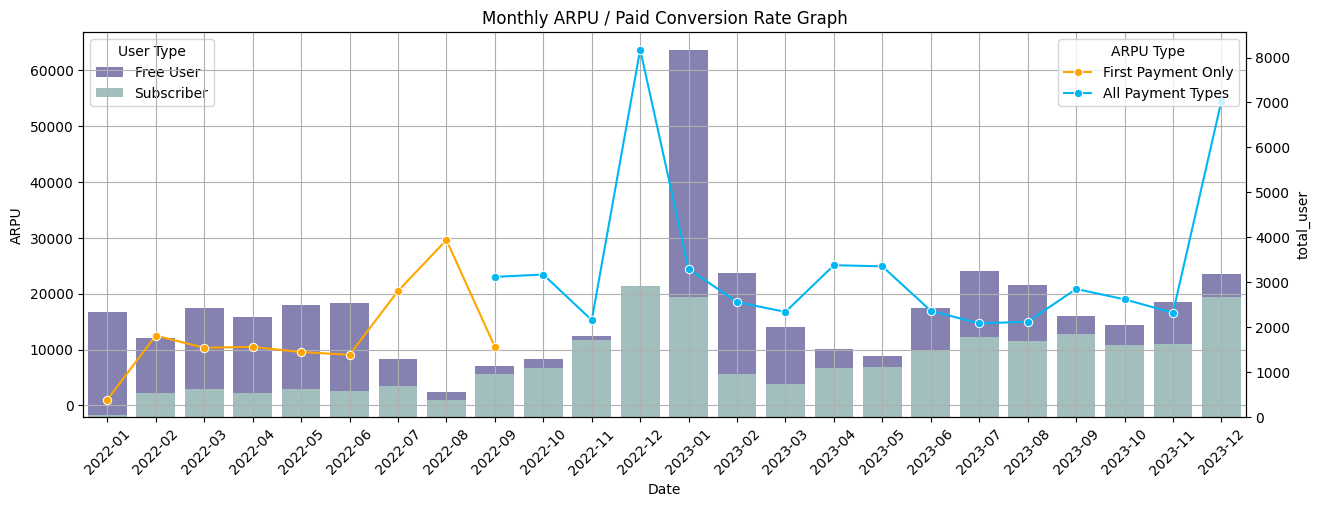

In [154]:
# 그래프 초기화
fig, ax3 = plt.subplots(figsize=(15, 5))

# 라인 그래프 생성
sns.lineplot(data=separated_arpu_2_df, x='period', y='ARPU', marker='o', ax=ax3, color='orange', label='First Payment Only')
sns.lineplot(data=separated_arpu_1_df, x='period', y='ARPU', marker='o', ax=ax3, color='#01b6f3', label='All Payment Types')

# 보조 그래프바 생성
ax4 = ax3.twinx()

# 바 그래프 생성
sns.barplot(data=concat_groupby_tmp[:-1], x='period', y='total_user', ax=ax4, color='#7e79b8', label='Free User')
sns.barplot(data=concat_groupby_tmp[:-1], x='period', y='subscriber', ax=ax4, color='#9dc3c1', label='Subscriber')

# 조더 값 조정 및 그리드 생성
ax3.set_zorder(3)
ax4.set_zorder(2)
ax3.grid(True, zorder=0)

# 라벨값 및 타이틀 생성
ax3.set_xlabel('Date')
ax3.set_ylabel('ARPU')
plt.title('Monthly ARPU / Paid Conversion Rate Graph')

# x-label의 각 값들을 회전
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)

# 투명하게 만들어서 grid가 보이도록 설정
ax3.patch.set_visible(False)

legend2 = ax3.legend(title='ARPU Type', loc='upper right')
legend2 = ax4.legend(title='User Type', loc='upper left')

# 그래프 출력
plt.show()

---
### Monthly Revenue Per Subscribe Plan

In [39]:
# 함수 정의

# period 변환 함수
def change_period(data):
    data = data.copy()
    data['period'] = data['client_event_time'].dt.to_period('M')
    
    return data

# groupby 함수
def groupby(data):
    # 유료 사용자를 기준으로 집계
    data = data.groupby('period').agg(
        total_paid_amount = ('paid_amount', 'sum'),  # 총 유료 금액
        total_count = ('user_id', 'count'),  # 전체 결제 건 수
        total_user = ('user_id', 'nunique'), # 전체 유저 수
        one_month_plan_user = ('plan.price', lambda x: x[x.isin([15920])].sum()),  # 1개월 플랜 사용자
        three_month_plan_user = ('plan.price', lambda x: (x[x.isin([42960])]).sum()),  # 3개월 플랜 사용자
        one_year_plan_user = ('plan.price', lambda x: (x[x.isin([131600])]).sum()),  # 1년 플랜 사용자
        promotion_plan_user = ('plan.price', lambda x: (x[x.isin([79200, 95520, 95200, 91200, 87200, 83200])]).sum()),  # 프로모션 플랜 사용자
    )
    
    return data


In [40]:
# 모든 결제 완료 이력
concat_df = pd.concat([complete_subscription_df, renew_subscription_df, resubscribe_df], axis=0)

# 필요한 데이터 컬럼만 추출
concat_df = concat_df[['user_id', 'client_event_time', 'event_type', 'plan.price', 'paid_amount']]

# Data Type 변경
concat_df['client_event_time'] = pd.to_datetime(concat_df['client_event_time']) + pd.Timedelta(hours=9)
concat_df['client_event_time'] = concat_df['client_event_time'].dt.date

# 특정한 열에 중복값이 있는지 체크 후 첫번째 값만 남기고 제거
concat_df = concat_df.drop_duplicates(subset=['user_id', 'client_event_time', 'paid_amount'], keep='first')

# 날짜 비교를 위한 데이터 재변환
concat_df['client_event_time'] = pd.to_datetime(concat_df['client_event_time'])

# 데이터 확인
display(concat_df)

,user_id,client_event_time,event_type,plan.price,paid_amount
0,1116a2ae90ca6b06f85feba27ad51ef0,2023-04-06,complete.subscription,15920,15920
1,c0f5678df8967163e6e2c464ed006791,2023-04-10,complete.subscription,131600,131600
2,79421b5d038205ad7adbb1e2c3b89741,2023-03-12,complete.subscription,131600,119756
3,bdffe1f18684704d4ea2d7eebcaed180,2023-04-12,complete.subscription,131600,131600
4,d4f54ecf6c4d7bf8742f80505f02d6dc,2023-05-31,complete.subscription,15920,15920
...,...,...,...,...,...
786,482cf2ed1eefbe648ce156e43d323114,2023-10-21,resubscribe.subscription,15920,15920
787,b6b9428216580dbdc053e0bb19083be1,2023-07-31,resubscribe.subscription,15920,15920
788,eaff98093acb9a109975957cafb2d105,2023-12-31,resubscribe.subscription,95520,95520
789,e6aace24ed8703d42ce43c4b8b1c7d66,2023-12-29,resubscribe.subscription,95520,95520


In [41]:
# complete.subscription, renew.subscription, resubscibe.subscription의 데이터가 모두 존재하는 부분을 분리
concat_df = concat_df[(concat_df['client_event_time'] >= '2022-01-01') & (concat_df['client_event_time'] <= '2024-01-01')]

In [42]:
# Month period 타입 변환
month_df = change_period(concat_df)

# groupby 및 reset_index()
df_groupby = groupby(month_df).reset_index()

# 데이터 타입 변환
df_groupby['period'] = df_groupby['period'].dt.to_timestamp()

# 리스트에 저장
list_groupby.append(df_groupby)
    
# 결과 저장
df_groupby

,period,total_paid_amount,total_count,total_user,one_month_plan_user,three_month_plan_user,one_year_plan_user,promotion_plan_user
0,2022-01-01,2466721,54,54,318400,1116960,1052800,0
1,2022-02-01,21949193,535,531,4951120,5713680,11975600,0
2,2022-03-01,25090147,652,633,6399840,5971440,14607600,0
3,2022-04-01,23275321,562,544,5094400,5756640,14212800,0
4,2022-05-01,23804028,632,617,5747120,7432080,12896800,0
5,2022-06-01,23111595,602,583,5444640,7131360,12370400,0
6,2022-07-01,26527391,710,691,6845600,7217280,14739200,0
7,2022-08-01,16304670,399,383,3757120,3565680,10528000,0
8,2022-09-01,25946018,972,968,11908160,7131360,7632800,0
9,2022-10-01,30143986,1106,1097,12751920,10568160,7764400,0


In [21]:
for columns in ['three_month_plan_user', 'one_year_plan_user', 'promotion_plan_user']:
    tmp_list = [0 for _ in range(100)]
    if columns == 'three_month_plan_user':
        for query, i in zip(df_groupby[columns].values, range(len(df_groupby))):
            tmp_list[i] += query
            tmp_list[i + 1] += query
            tmp_list[i + 2] += query

        tmp_list = tmp_list[:len(df_groupby)]
        df_groupby['three_month_plan_activation'] = tmp_list

    elif columns == 'one_year_plan_user':
        for query, i in zip(df_groupby[columns].values, range(len(df_groupby))):
            tmp_list[i] += query
            tmp_list[i + 1] += query
            tmp_list[i + 2] += query
            tmp_list[i + 3] += query
            tmp_list[i + 4] += query
            tmp_list[i + 5] += query
            tmp_list[i + 6] += query
            tmp_list[i + 7] += query
            tmp_list[i + 8] += query
            tmp_list[i + 9] += query
            tmp_list[i + 10] += query
            tmp_list[i + 11] += query

        tmp_list = tmp_list[:len(df_groupby)]
        df_groupby['one_year_plan_activation'] = tmp_list

    else:
        for query, i in zip(df_groupby[columns].values, range(len(df_groupby))):
            tmp_list[i] += query
            tmp_list[i + 1] += query
            tmp_list[i + 2] += query
            tmp_list[i + 3] += query
            tmp_list[i + 4] += query
            tmp_list[i + 5] += query
            tmp_list[i + 6] += query
            tmp_list[i + 7] += query
            tmp_list[i + 8] += query
            tmp_list[i + 9] += query
            tmp_list[i + 10] += query
            tmp_list[i + 11] += query

        tmp_list = tmp_list[:len(df_groupby)]
        df_groupby['promotion_plan_activation'] = tmp_list

In [35]:
df_groupby

,period,total_paid_amount,total_count,total_user,one_month_plan_user,three_month_plan_user,one_year_plan_user,promotion_plan_user
0,2022-01-01,2466721,54,54,318400,372320.0,8.773333e+04,0.000000e+00
1,2022-02-01,21949193,535,531,4951120,1904560.0,9.979667e+05,0.000000e+00
2,2022-03-01,25090147,652,633,6399840,1990480.0,1.217300e+06,0.000000e+00
3,2022-04-01,23275321,562,544,5094400,1918880.0,1.184400e+06,0.000000e+00
4,2022-05-01,23804028,632,617,5747120,2477360.0,1.074733e+06,0.000000e+00
5,2022-06-01,23111595,602,583,5444640,2377120.0,1.030867e+06,0.000000e+00
6,2022-07-01,26527391,710,691,6845600,2405760.0,1.228267e+06,0.000000e+00
7,2022-08-01,16304670,399,383,3757120,1188560.0,8.773333e+05,0.000000e+00
8,2022-09-01,25946018,972,968,11908160,2377120.0,6.360667e+05,0.000000e+00
9,2022-10-01,30143986,1106,1097,12751920,3522720.0,6.470333e+05,0.000000e+00


In [43]:
name1 = 'one_month_plan_user'
name2 = 'three_month_plan_user'
name3 = 'one_year_plan_user'
name4 = 'promotion_plan_user'

data = df_groupby.melt(
    id_vars='period',
    value_vars=[name1, name2, name3, name4],
    var_name='plan_type',
    value_name='user_count')

# '2024-01' 데이터 제거
data = data[data['period'] != '2024-01']

C:\Users\lento\AppData\Local\Temp\ipykernel_28492\2261802750.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


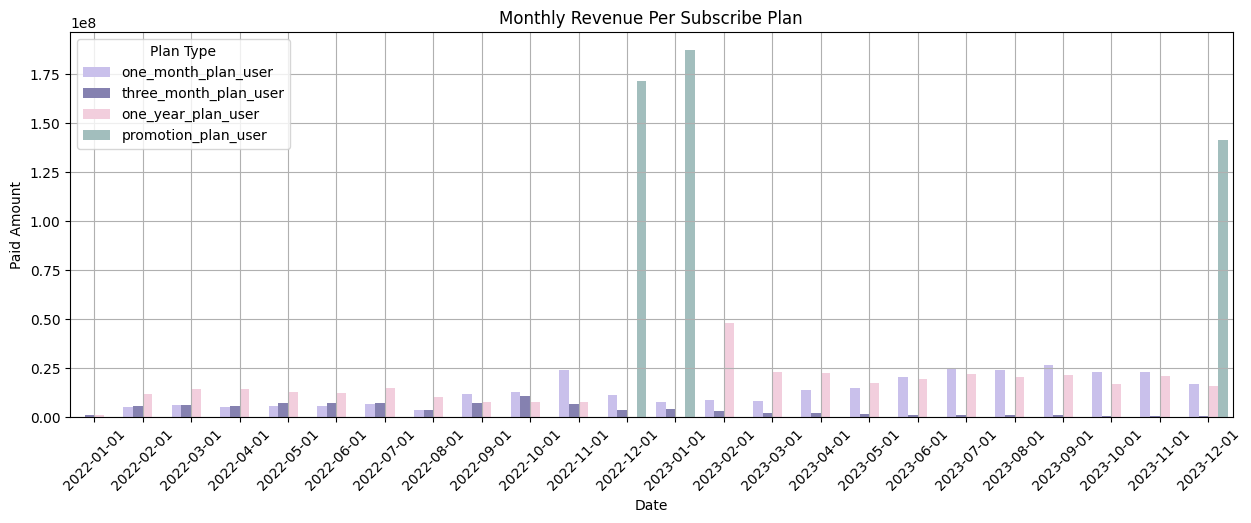

In [48]:
# 그래프 생성
fig, ax1 = plt.subplots(figsize=(15, 5))

name1 = 'one_month_plan_user'
name2 = 'three_month_plan_user'
name3 = 'one_year_plan_user'
name4 = 'promotion_plan_user'

# 색상 설정
plan_colors = {
    name1: '#c5b9f2', 
    name2: '#7e79b8', 
    name3: '#f8c8dc', 
    name4: '#9dc3c1'
}

# # 바 플롯 그리기 (색상 지정 및 alpha 조정)
sns.barplot(x='period', y='user_count', hue='plan_type', data=data, ax=ax1, palette=plan_colors)

# zorder 조정
ax1.set_zorder(3)
ax1.grid(True, zorder=0)

# 라벨 및 제목 설정
ax1.set_xlabel('Date')
ax1.set_ylabel('Paid Amount')
plt.title('Monthly Revenue Per Subscribe Plan')

# x축 회전
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# 투명하게 만들어서 grid가 보이도록 설정
ax1.patch.set_visible(False)

# 범례 수동으로 설정 (색상과 항목이 매칭되도록)
ax1.legend( title='Plan Type', loc='upper left')

plt.show()

---
## 기타 분석

### 기타 분석 - 1

In [66]:
enter_main_page_df = enter.main_page()

In [67]:
class desktop_mobile_filter: 
    def __init__(self, class_name):
        self.class_name = class_name
    
    @staticmethod
    def desktop(data):
        desktop_columns = ((data['device_family'].str.contains('Windows')) | (data['device_family'].str.contains('Mac')))
        return desktop_columns
    
    @staticmethod
    def mobile(data):
        mobile_columns = ((data['device_family'].str.contains('Samsung')) |
                          (data['device_family'].str.contains('LG')) |
                          (data['device_family'].str.contains('Apple')) |
                          (data['device_family'] == 'Android') |
                          (data['device_family'] == 'iOS'))
        return mobile_columns

In [68]:
enter_main_page_df[desktop_mobile_filter.desktop(enter_main_page_df)]

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
1,Dongdaemun-gu,2023-04-05 21:04:28.967000,South Korea,NaN,Mac,Mac,enter.main_page,Korean,Chrome,111.0.0.0,Web,b2b31f00b82edc6419b25324a7ae41a4
8,Jung-gu,2023-04-05 21:55:29.031000,South Korea,NaN,Windows,Windows,enter.main_page,Korean,Chrome,111.0.0.0,Web,NaN
14,Wonju,2023-04-05 21:44:18.121000,South Korea,NaN,Windows,Windows,enter.main_page,Korean,Chrome,111.0.0.0,Web,NaN
15,Seoul,2023-04-05 21:44:50.470000,South Korea,NaN,Mac,Mac,enter.main_page,Korean,Safari,15.6.1,Web,NaN
18,Naju,2023-04-05 21:50:39.168000,South Korea,NaN,Windows,Windows,enter.main_page,Korean,Firefox,111.0,Web,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2133540,Dongjak-gu,2023-10-10 05:57:19.646000,South Korea,NaN,Windows,Windows,enter.main_page,Korean,Edge,117.0.2045.60,Web,NaN
2133543,Jeongeup,2023-10-10 05:53:29.283000,South Korea,NaN,Windows,Windows,enter.main_page,Korean,Chrome,117.0.0.0,Web,NaN
2133544,Jeongeup,2023-10-10 05:54:17.572000,South Korea,NaN,Windows,Windows,enter.main_page,Korean,Chrome,117.0.0.0,Web,NaN
2133545,Gangnam-gu,2023-10-10 05:54:33.164000,South Korea,NaN,Windows,Windows,enter.main_page,Korean,Chrome,117.0.0.0,Web,NaN


In [69]:
enter_main_page_df[desktop_mobile_filter.mobile(enter_main_page_df)]

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
0,Seongnam-si,2023-04-05 21:55:06.140000,South Korea,NaN,Samsung Phone,Samsung Galaxy S21 5G,enter.main_page,Korean,Whale,1.0.0.0,Web,NaN
2,Hwaseong-si,2023-04-05 21:01:31.258000,South Korea,NaN,Samsung Galaxy Note,Samsung Galaxy Note10+ 5G,enter.main_page,Korean,Chrome,111.0.0.0,Web,NaN
3,Hwaseong-si,2023-04-05 21:02:50.374000,South Korea,NaN,Samsung Galaxy Note,Samsung Galaxy Note10+ 5G,enter.main_page,Korean,Chrome,111.0.0.0,Web,NaN
4,Seoul,2023-04-05 21:30:33.727000,South Korea,NaN,Samsung Phone,Samsung Galaxy A51 5G,enter.main_page,Korean,Chrome,112.0.0.0,Web,NaN
5,Sejong,2023-04-05 21:36:02.749000,South Korea,NaN,Apple iPhone,Apple iPhone 12 Mini,enter.main_page,Korean,Instagram,276.1.0.14.103,Web,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2133537,Busan,2023-10-10 05:42:21.060000,South Korea,NaN,Samsung Phone,Samsung Galaxy S23 Ultra,enter.main_page,Korean,Instagram,303.0.0.40.109,Web,NaN
2133538,Seoul,2023-10-10 05:45:14.703000,South Korea,NaN,Apple iPhone,Apple iPhone,enter.main_page,Korean,Mobile Safari,16.6,Web,NaN
2133541,Seoul,2023-10-10 05:54:19.608000,South Korea,NaN,Apple iPhone,Apple iPhone,enter.main_page,Korean,Mobile Safari,17.0.1,Web,NaN
2133542,Seoul,2023-10-10 05:54:44.015000,South Korea,NaN,Apple iPhone,Apple iPhone,enter.main_page,Korean,Mobile Safari,17.0.1,Web,NaN


In [70]:
enter_main_page_df[~((desktop_mobile_filter.desktop(enter_main_page_df) | (desktop_mobile_filter.mobile(enter_main_page_df))))]['device_family'].value_counts().head(15)

device_family
K                     41600
Linux                 16489
Xiaomi Phone           1799
Chromium OS            1269
CentOS                  733
Redmi Phone             657
Google Nexus Phone      635
Google Phone            231
Motorola Phone          153
Ubuntu                  143
Lenovo TB-J606F         128
2201116SG                92
Google Pixel 7a          85
M2101K7AG                84
Oppo Phone               81
Name: count, dtype: int64